
# Previsão de Receita Futura - Melhores Compras

Este notebook visa desenvolver e avaliar modelos de previsão de receita futura para a empresa fictícia Melhores Compras,
utilizando variáveis de vendas semanais e macroeconômicas.


In [1]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Carregamento e pré-processamento dos dados
data = pd.read_csv(r"C:\repositorios_pessoais\fiap_pbls_2024_2\PBL_fase_7\sales.csv")

# Converter 'Date' para datetime
data["Date"] = pd.to_datetime(data["Date"], format="%d-%m-%Y")

# Ajustar Fuel_Price e Unemployment
data["Fuel_Price"] = data["Fuel_Price"] / 1000
data["Unemployment"] = data["Unemployment"] / 1000

# Verificar estrutura dos dados
data.head()

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106



# Análise Exploratória dos Dados (EDA)

Nesta seção, vamos analisar a relação entre as variáveis independentes e a variável de interesse `Weekly_Sales`.


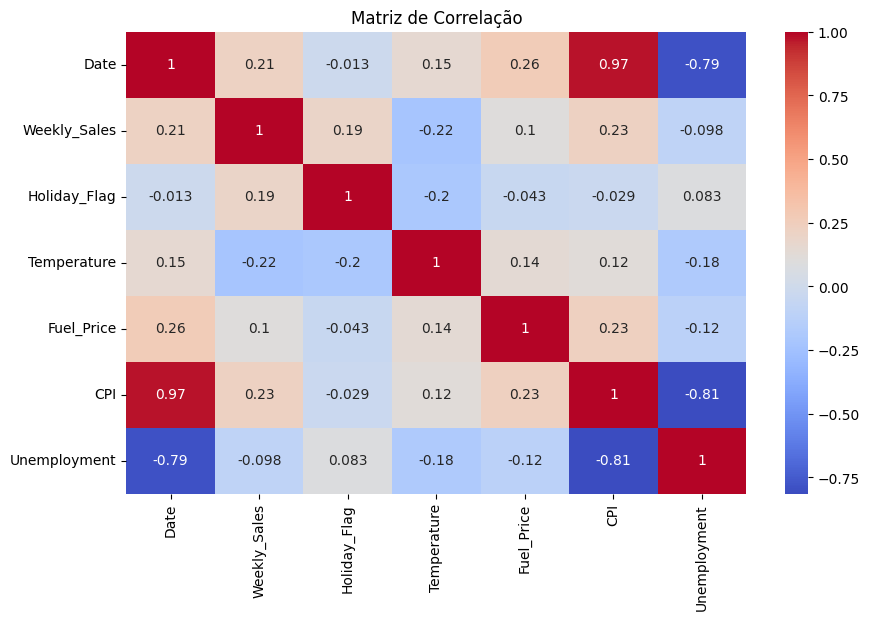

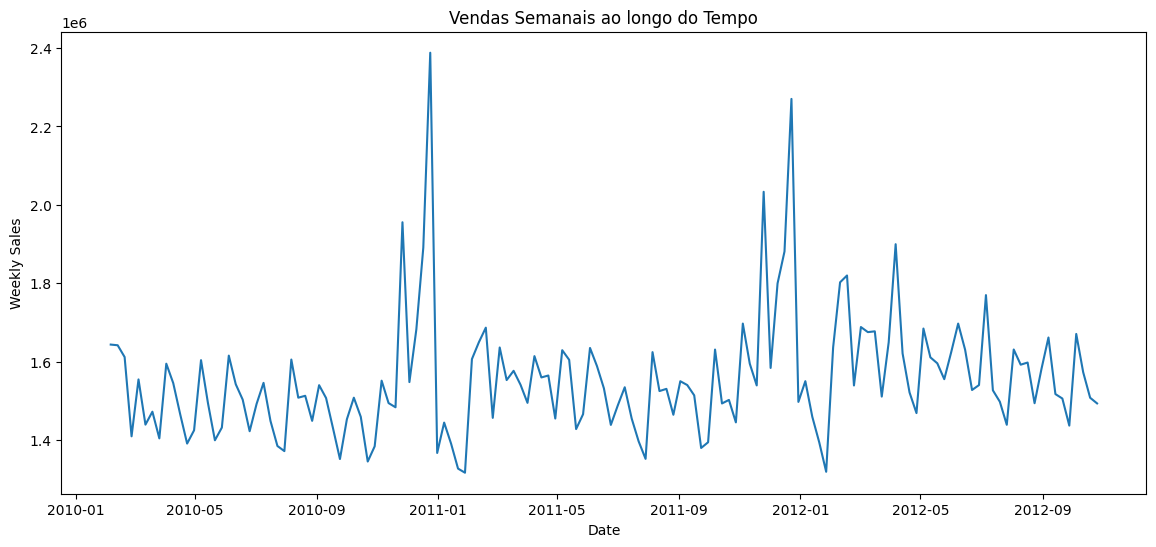

In [3]:
# Visualizar correlações
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

# Visualização de tendências ao longo do tempo
plt.figure(figsize=(14, 6))
plt.plot(data["Date"], data["Weekly_Sales"])
plt.title("Vendas Semanais ao longo do Tempo")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.show()


# Modelagem e Treinamento

Aqui, aplicamos diferentes algoritmos de regressão para prever as vendas futuras, iniciando pela Regressão Linear.


Linear Regression MAE: 115281.25, RMSE: 152290.30, R2: 0.04


[]

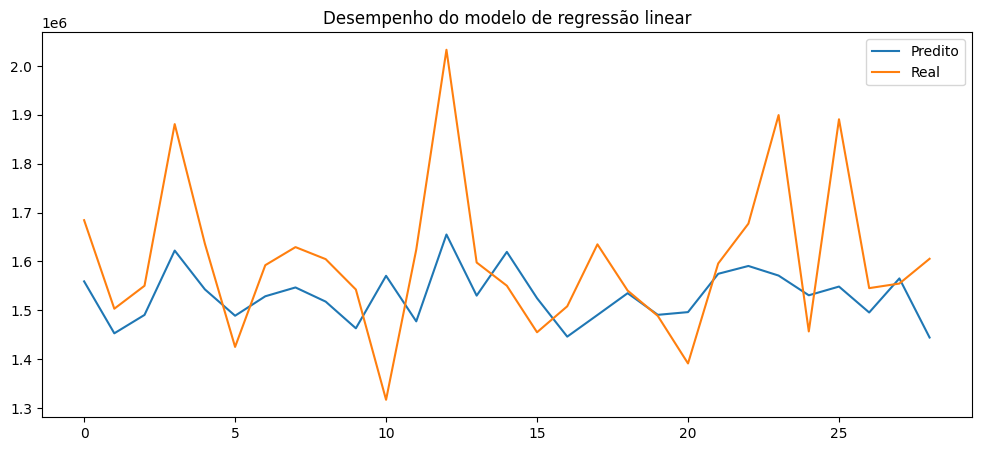

In [4]:
# Separar variáveis preditoras e alvo
X = data[["Holiday_Flag", "Temperature", "Fuel_Price", "CPI", "Unemployment"]]
y = data["Weekly_Sales"]

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Modelo de Regressão Linear
fiapinho_linear = LinearRegression()
fiapinho_linear.fit(X_train, y_train)

# Previsões e Avaliação
y_pred_lr = fiapinho_linear.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_score_lr = r2_score(y_test, y_pred_lr)

print(
    f"Linear Regression MAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}, R2: {r2_score_lr:.2f}"
)

plt.figure(figsize=(12, 5))
plt.plot(y_pred_lr, label="Predito")
plt.plot(y_test.reset_index(drop=True), label="Real")
plt.title("Desempenho do modelo de regressão linear")
plt.legend()
plt.plot()

[]

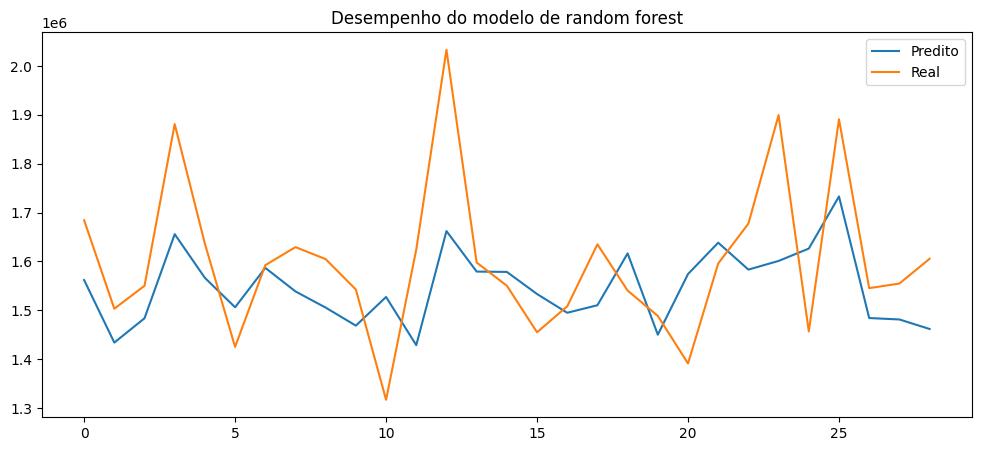

In [5]:
# Modelo Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_score_rf = r2_score(y_test, y_pred_rf)

plt.figure(figsize=(12, 5))
plt.plot(y_pred_rf, label="Predito")
plt.plot(y_test.reset_index(drop=True), label="Real")
plt.title("Desempenho do modelo de random forest")
plt.legend()
plt.plot()

[]

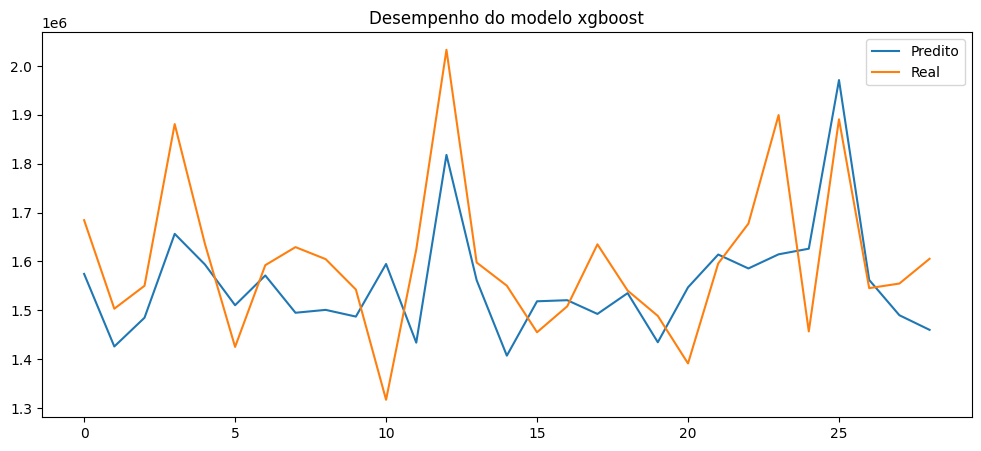

In [6]:
# Modelo XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_score_xbg = r2_score(y_test, y_pred_xgb)

plt.figure(figsize=(12, 5))
plt.plot(y_pred_xgb, label="Predito")
plt.plot(y_test.reset_index(drop=True), label="Real")
plt.title("Desempenho do modelo xgboost")
plt.legend()
plt.plot()


# Conclusão

Os modelos testados indicam diferentes níveis de desempenho. A Regressão Linear serve como linha de base, enquanto
o Random Forest e o XGBoost capturam padrões complexos, resultando em maior precisão.
